# Software Take Home Assignment

In this file, you may find the solutions for Software Take Home Assignment.

The code is written in Python 3.5.

In order to visualize the outputs, the functions are performed on Jupyter Lab web-based interface. However, the functions can be operated at .py file, as well.

For plotting the second task's time complexity, matplotlib and numpy libraries are used.

*author : Ozan Cakiroglu*

# 1. Memoizer Task
Write a function that accepts a single-argument function f, and an integer k, and returns a function 
that behaves the same as f except it caches the last k results of f.

For instance, if memoize is the function we’re after, and let mem f = memoize(f, 2), then:
- mem f(arg1) → f(arg1) is computed and cached
- mem f(arg1) → f(arg1) is returned from cache
- mem f(arg2) → f(arg2) is computed and cached
- mem f(arg3) → f(arg3) is computed and cached, and f(arg1) is evicted

## Solution 

### Comments
It is intended to create a class whose arguments are a function (func) and an integer (memo_size)

func is any function the class accepts for memoizing
memo_size is the number of elements it is desired to cache
Extra comments on the methods or the parameters of the class may be observed inline.

The class can also have a function which has more than one arguments. A toy function, multiply(arg) is defined and it is used for memoizing.

In order to observe the functionality of the class, there are some print commands written. You may examine the specific example which was mentioned on the assignment document.

Firstly, **Cache()** class is defined. Cache() gets a function (func) and a memory size (mem_size) for initialization. The class creates a memory for the function. 

After initialization, when function is called with an input, the function is evaluated for the given input and written in memory.

For further process, the method firstly checks if the function's value is in the memory for given input. If so, it does not evaluates the whole process, it just returns to the value. Else, it evaluates the function and saves the value in memory.

### Code

In [1]:
class Cache():
    def __init__(self, func, memo_size=2):
        self.func      = func
        self.memo_size = memo_size
        self.memo      = dict()
        # memo is to cache the values in dictionary
        self.arg_list  = list()
        # arg_list is to obtain temporal information
        
                    
    def __call__(self, *args):       
        if not args in self.memo.keys():
            self.memo[args] = self.func(*args)
            self.arg_list.append(args)  
            self.isReached()
            print('Function is evaluated for given input: f{} = {}'.format(args, self.memo[args]))
            print('MEMORY:', self.memo)
        else:
            print('Value is cached from memory:           f{} = {}'.format(args, self.memo[args]))
            print('MEMORY:', self.memo)
        return self.memo[args]
    
    def isReached(self):
        # if the number of elements in memory is more than memo_size
        # delete the oldest element in dictionary(Cache)
        if len(self.memo) > self.memo_size:
            print(self.arg_list[0], ':', self.memo[self.arg_list[0]], 'is deleted from memory')
            del self.memo[self.arg_list[0]]
            del self.arg_list[0]

def multiply(a,b):
    return a*b

multiply = Cache(multiply, memo_size=2)     

input_list = [0, 1, 1, 2, 2, 3, 4]

for inp in input_list:
    multiply(inp, inp)
    print('--'*20)

Function is evaluated for given input: f(0, 0) = 0
MEMORY: {(0, 0): 0}
----------------------------------------
Function is evaluated for given input: f(1, 1) = 1
MEMORY: {(0, 0): 0, (1, 1): 1}
----------------------------------------
Value is cached from memory:           f(1, 1) = 1
MEMORY: {(0, 0): 0, (1, 1): 1}
----------------------------------------
(0, 0) : 0 is deleted from memory
Function is evaluated for given input: f(2, 2) = 4
MEMORY: {(1, 1): 1, (2, 2): 4}
----------------------------------------
Value is cached from memory:           f(2, 2) = 4
MEMORY: {(1, 1): 1, (2, 2): 4}
----------------------------------------
(1, 1) : 1 is deleted from memory
Function is evaluated for given input: f(3, 3) = 9
MEMORY: {(3, 3): 9, (2, 2): 4}
----------------------------------------
(2, 2) : 4 is deleted from memory
Function is evaluated for given input: f(4, 4) = 16
MEMORY: {(3, 3): 9, (4, 4): 16}
----------------------------------------


# 2. Knights of the Chess

For this problem, we are interested in the number of phone numbers that can be generated
using a specific set of rules on a standard phone keypad (Figure 1). Here are the rules:

- phone numbers begin with the digit 2
- phone numbers are 10 digits long
- successive digits in each phone number are chosen as a knight moves in chess

In chess, a knight (sometimes called a horse) moves two steps vertically and one step hori-
zontally OR two steps horizontally and one step vertically. For example, from the digit 2 on
the keypad a knight can move to digits 7 or 9; from the digit 6 on the keypad a knight can
move to digits 1, 7 or 0. Note that a phone number may contain the same digit more than
once. Only numerical digits can be used in phone numbers .

How many different phone numbers can be formed given these rules? How does your solution
scale with n the length of phone numbers? In particular, what is its time complexity?
For your solution, provide a function that takes as input the length of phone numbers as well
as the initial start position on the keypad, and for the output gives the number of unique
phone numbers.

## Solution

### Comments 

A recursive function is proposed as a solution for the second task Knights on the phone.

Firstly, a dictionary whose keys are digits in keypad and values are the corresponding possible knight moves (or stands still) is generated.

After that, the main function digitCombs(*args) recursive function is written.

Extra comments on the parameters of the function may be observed inline.

You may examine the specific example which was mentioned on the assignment document.

Possible number of phone numbers starts with 2 and has a length of 10: 2 - - - - - - - - -


### Code

In [2]:
# digit_pos is a dictionary whose keys are digits in keypad,
# and values are the corresponding knight moves
digit_pos = {
            0: (0,4,6),
            1: (1,6,8),
            2: (2,7,9),
            3: (3,4,8),
            4: (0,3,4,9),
            5: (5,),
            6: (0,1,6,7),
            7: (2,6,7),
            8: (1,3,8),
            9: (2,4,9)
            }

def digitCombs(startInd, nDigits, currDigit=1):
    '''
    Inputs
    -----------
    startInd  : int, initial digit for generation of phone numbers
    nDigits   : int, length of phone numbers
    currDigit : int, current position of digit (necessity for recursive function) 
    
    Returns
    ----------
    combinations : int, the number of different combinations for given the initial digit and the length of phone number
    '''
    
    combinations = 0
    if nDigits == currDigit:
        return 1
    else:
        val = 0
        for i in range(len(digit_pos[startInd])):
            val = digitCombs(digit_pos[startInd][i],nDigits, currDigit+1)
            combinations +=val
        return combinations

start  = 2
length = 10
starts2len10 = digitCombs(start, length)
print('Possible number of phone numbers starts with {} and has a length of {} is {}'.format(start, length, starts2len10))

Possible number of phone numbers starts with 2 and has a length of 10 is 34923


### Graph

The function's time complexity depending on n can be represented as O(logn)

For instance, numbers starts with 2 and has a length of values in between (1,11) are plotted in the second cell.

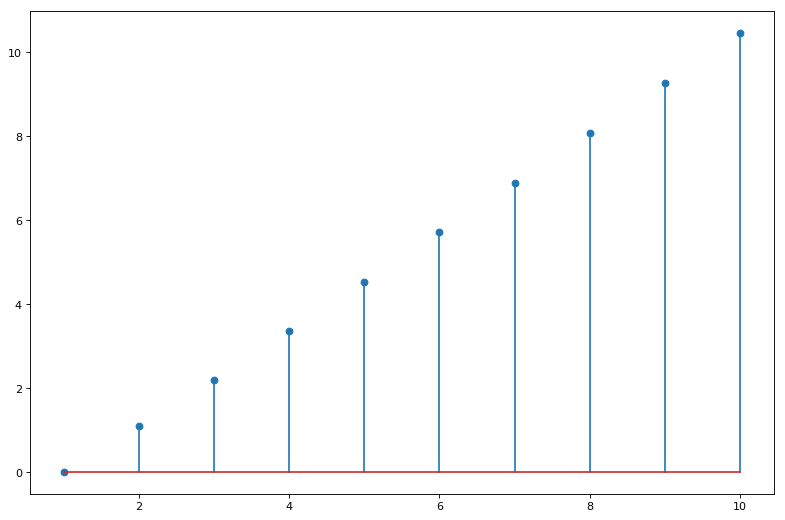

[1, 3, 9, 29, 93, 303, 989, 3241, 10633, 34923]


In [4]:
from matplotlib import pyplot as plt
import numpy as np

starts2 = [digitCombs(2,i) for i in range(1,11)]

plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.stem(range(1,11),np.log(starts2))
plt.show()
print(starts2)